In [16]:
!pip install xgboost
!pip install pmdarima
!pip install statsmodels

#XGBoost

In [3]:
import pandas as pd

data = pd.read_csv('train_data_2015 (2).csv')
data.head()

<ipython-input-3-ba2d394a445a>:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train_data_2015 (2).csv')


,Unnamed: 0,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,oil_price,avg_temp,holiday_type
0,0,38595440,02-01-15,1,103665,6.0,False,BREAD/BAKERY,2712,1,52.72,13.8,Bridge
1,1,38595441,02-01-15,1,105575,3.0,False,GROCERY I,1045,0,52.72,13.8,Bridge
2,2,38595442,02-01-15,1,105577,1.0,False,GROCERY I,1045,0,52.72,13.8,Bridge
3,3,38595443,02-01-15,1,105693,1.0,False,GROCERY I,1034,0,52.72,13.8,Bridge
4,4,38595444,02-01-15,1,105857,2.0,False,GROCERY I,1092,0,52.72,13.8,Bridge


In [5]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%y')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek

data.head()

,Unnamed: 0,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,oil_price,avg_temp,holiday_type,year,month,day,dayofweek
0,0,38595440,2015-01-02,1,103665,6.0,False,BREAD/BAKERY,2712,1,52.72,13.8,Bridge,2015,1,2,4
1,1,38595441,2015-01-02,1,105575,3.0,False,GROCERY I,1045,0,52.72,13.8,Bridge,2015,1,2,4
2,2,38595442,2015-01-02,1,105577,1.0,False,GROCERY I,1045,0,52.72,13.8,Bridge,2015,1,2,4
3,3,38595443,2015-01-02,1,105693,1.0,False,GROCERY I,1034,0,52.72,13.8,Bridge,2015,1,2,4
4,4,38595444,2015-01-02,1,105857,2.0,False,GROCERY I,1092,0,52.72,13.8,Bridge,2015,1,2,4


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['family'] = label_encoder.fit_transform(data['family'])
data['holiday_type'] = label_encoder.fit_transform(data['holiday_type'])
data['onpromotion'] = data['onpromotion'].astype(int)

In [8]:
data.head()

,Unnamed: 0,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,oil_price,avg_temp,holiday_type,year,month,day,dayofweek
0,0,38595440,2015-01-02,1,103665,6.0,0,3,2712,1,52.72,13.8,0,2015,1,2,4
1,1,38595441,2015-01-02,1,105575,3.0,0,9,1045,0,52.72,13.8,0,2015,1,2,4
2,2,38595442,2015-01-02,1,105577,1.0,0,9,1045,0,52.72,13.8,0,2015,1,2,4
3,3,38595443,2015-01-02,1,105693,1.0,0,9,1034,0,52.72,13.8,0,2015,1,2,4
4,4,38595444,2015-01-02,1,105857,2.0,0,9,1092,0,52.72,13.8,0,2015,1,2,4


In [9]:
from sklearn.model_selection import train_test_split

features = ['store_nbr', 'item_nbr', 'onpromotion', 'family', 'class', 'perishable', 'oil_price', 'avg_temp', 'holiday_type', 'year', 'month', 'day', 'dayofweek']
target = 'unit_sales'

X = data[features]
Y = data[target]

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
import xgboost as xgb
from xgboost import DMatrix

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
from sklearn.metrics import mean_squared_error

ypred = model.predict(xtest)

rmse = mean_squared_error(ytest, ypred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 14.928226515259144


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
mean_sales = ytest.mean()
std_sales = ytest.std()
print(f"Mean Sales: {mean_sales}, Std Dev: {std_sales}")

Mean Sales: 10.337556402737047, Std Dev: 18.32146497403811


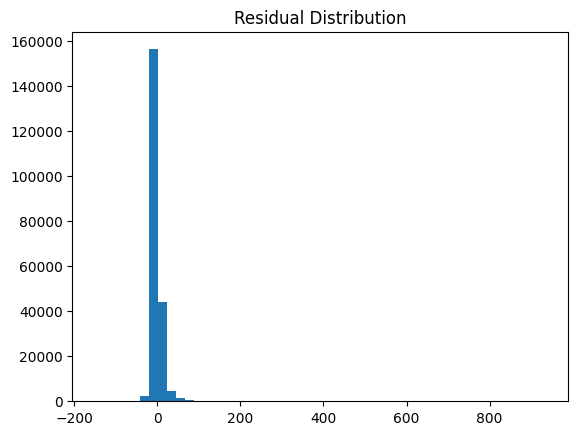

In [15]:
import matplotlib.pyplot as plt

residuals = ytest - ypred
plt.hist(residuals, bins=50)
plt.title("Residual Distribution")
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(xtrain, ytrain)
print(grid_search.best_params_)

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200}


In [17]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=8, learning_rate=0.2)
model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
ypred = model.predict(xtest)
# print(f"Test: {xtest}")
# print(f"Actual: {ytest}")
# print(f"Prediction: type({ypred})")
print(type(ytest))
ypred = pd.Series(ypred)
print(type(ypred))

rmse = mean_squared_error(ytest, ypred, squared=False)
print(f"RMSE: {rmse}")

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
RMSE: 12.873841635077511


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
print(ytest)
print(ypred)

781974    79.000
937737     3.000
907828     4.000
784628     2.000
662460     2.000
           ...  
673443     1.000
656736    16.000
858501    17.000
617079     6.504
487559     1.000
Name: unit_sales, Length: 209715, dtype: float64
0         56.726498
1          2.712325
2          9.582028
3          0.704094
4          3.819009
            ...    
209710     2.004286
209711    10.871534
209712    11.839602
209713    13.552716
209714     4.307400
Length: 209715, dtype: float32


#SARIMA

In [1]:
import pandas as pd

data = pd.read_csv('train_data_2015 (2).csv')
data.head()

<ipython-input-1-ba2d394a445a>:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train_data_2015 (2).csv')


,Unnamed: 0,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,oil_price,avg_temp,holiday_type
0,0,38595440,02-01-15,1,103665,6.0,False,BREAD/BAKERY,2712,1,52.72,13.8,Bridge
1,1,38595441,02-01-15,1,105575,3.0,False,GROCERY I,1045,0,52.72,13.8,Bridge
2,2,38595442,02-01-15,1,105577,1.0,False,GROCERY I,1045,0,52.72,13.8,Bridge
3,3,38595443,02-01-15,1,105693,1.0,False,GROCERY I,1034,0,52.72,13.8,Bridge
4,4,38595444,02-01-15,1,105857,2.0,False,GROCERY I,1092,0,52.72,13.8,Bridge


In [8]:
data["date"] = pd.to_datetime(data["date"])
data

,Unnamed: 0,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,oil_price,avg_temp,holiday_type
0,0,38595440,2015-02-01,1,103665,6.0,False,BREAD/BAKERY,2712,1,52.72,13.80,Bridge
1,1,38595441,2015-02-01,1,105575,3.0,False,GROCERY I,1045,0,52.72,13.80,Bridge
2,2,38595442,2015-02-01,1,105577,1.0,False,GROCERY I,1045,0,52.72,13.80,Bridge
3,3,38595443,2015-02-01,1,105693,1.0,False,GROCERY I,1034,0,52.72,13.80,Bridge
4,4,38595444,2015-02-01,1,105857,2.0,False,GROCERY I,1092,0,52.72,13.80,Bridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,41090574,2015-02-13,20,1117661,17.0,False,BEVERAGES,1132,0,52.66,13.75,NaN
1048571,1048571,41090575,2015-02-13,20,1117662,8.0,False,BEVERAGES,1132,0,52.66,13.75,NaN
1048572,1048572,41090576,2015-02-13,20,1118683,7.0,False,AUTOMOTIVE,6806,0,52.66,13.75,NaN
1048573,1048573,41090577,2015-02-13,20,1118775,6.0,False,GROCERY I,1028,0,52.66,13.75,NaN


In [9]:
dataAgg = data.groupby("date")["unit_sales"].sum().reset_index()
dataAgg

,date,unit_sales
0,2015-01-02,441460.570
1,2015-01-13,194812.770
2,2015-01-14,203551.673
3,2015-01-15,179786.805
4,2015-01-16,213150.647
5,2015-01-17,335118.548
6,2015-01-18,369488.206
7,2015-01-19,224270.518
8,2015-01-20,197887.624
9,2015-01-21,213772.205


In [10]:
dataAgg.set_index("date", inplace=True)
dataAgg.head()

,unit_sales
date,
2015-01-02,441460.570
2015-01-13,194812.770
2015-01-14,203551.673
2015-01-15,179786.805
2015-01-16,213150.647


In [13]:
dataAgg = dataAgg.asfreq("D", method="ffill")
dataAgg

,unit_sales
date,
2015-01-02,441460.570
2015-01-03,441460.570
2015-01-04,441460.570
2015-01-05,441460.570
2015-01-06,441460.570
...,...
2015-11-28,189378.587
2015-11-29,189378.587
2015-11-30,189378.587


In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dataAgg["unit_sales"])

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")  # p-value < 0.05 indicates stationarity

ADF Statistic: -4.345627509894999
p-value: 0.0003699803576631044


In [18]:
from pmdarima import auto_arima

# Auto ARIMA
auto_model_SARIMA = auto_arima(dataAgg["unit_sales"], seasonal=True, m=7)  # Weekly seasonality
auto_model_ARIMA = auto_arima(dataAgg["unit_sales"], seasonal=False, m=7)  # Weekly seasonality
print(auto_model_SARIMA.summary())
print(auto_model_ARIMA.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  335
Model:             SARIMAX(3, 0, 0)x(1, 0, 0, 7)   Log Likelihood               -3969.445
Date:                           Wed, 11 Dec 2024   AIC                           7950.889
Time:                                   03:34:41   BIC                           7973.774
Sample:                               01-02-2015   HQIC                          7960.013
                                    - 12-02-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.19e+04   5461.195      5.841      0.000    2.12e+04    4.26e+04
ar.L1          0.6240      0.031     20.301

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(dataAgg["unit_sales"], order=(2, 0, 1)).fit()  # Replace p, d, q with trial values
print(arima_model.summary())

# Forecast
forecast_arima = arima_model.forecast(steps=30)  # Forecast for 30 days

                               SARIMAX Results                                
Dep. Variable:             unit_sales   No. Observations:                  335
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -3973.483
Date:                Wed, 11 Dec 2024   AIC                           7956.967
Time:                        03:43:41   BIC                           7976.038
Sample:                    01-02-2015   HQIC                          7964.570
                         - 12-02-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.385e+05   2.78e+04      8.574      0.000    1.84e+05    2.93e+05
ar.L1          1.3526      0.084     16.030      0.000       1.187       1.518
ar.L2         -0.3710      0.078     -4.733      0.0

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
sarima_model = SARIMAX(
    dataAgg["unit_sales"],
    order=(3, 0, 0),  # Non-seasonal parameters
    seasonal_order=(1, 0, 0, 7),  # Seasonal parameters
).fit()
print(sarima_model.summary())

forecast_sarima = sarima_model.get_forecast(steps=30)  # Forecast for 30 days
forecast_sarima_mean = forecast_sarima.predicted_mean

                                     SARIMAX Results                                     
Dep. Variable:                        unit_sales   No. Observations:                  335
Model:             SARIMAX(3, 0, 0)x(1, 0, 0, 7)   Log Likelihood               -3976.448
Date:                           Wed, 11 Dec 2024   AIC                           7962.896
Time:                                   03:45:25   BIC                           7981.967
Sample:                               01-02-2015   HQIC                          7970.499
                                    - 12-02-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6878      0.029     23.597      0.000       0.631       0.745
ar.L2          0.1500      0.059      2.549

In [23]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for ARIMA
rmse_arima = mean_squared_error(dataAgg["unit_sales"][-30:], forecast_arima, squared=False)

# Calculate RMSE for SARIMA
rmse_sarima = mean_squared_error(
    dataAgg["unit_sales"][-30:], forecast_sarima_mean, squared=False
)

print(f"RMSE (ARIMA): {rmse_arima}")
print(f"RMSE (SARIMA): {rmse_sarima}")

RMSE (ARIMA): 18904.296524366353
RMSE (SARIMA): 23872.29019116576


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


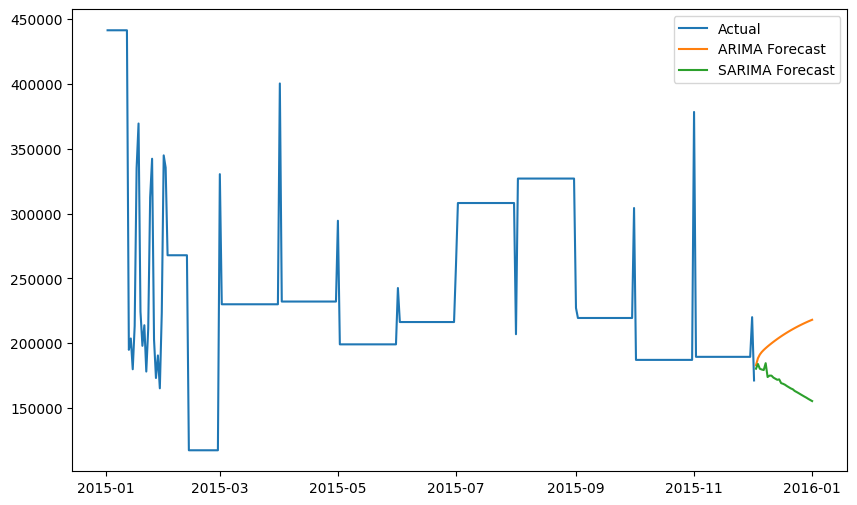

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dataAgg["unit_sales"], label="Actual")
plt.plot(forecast_arima.index, forecast_arima, label="ARIMA Forecast")
plt.plot(forecast_sarima_mean.index, forecast_sarima_mean, label="SARIMA Forecast")
plt.legend()
plt.show()
